  **This is the hw NOTES for section *04_06 Reaction Diffusion*.**

The Gray-Scott model represents the reaction and diffusion of two generic chemical species, $U$ and $V$, whose concentration at a point in space is represented by variables $u$ and $v$. The model follows some simple rules.  

*  Each chemical _diffuses_ through space at its own rate.
*  Species $U$ is added at a constant feed rate into the system.
*  Two units of species V can 'turn' a unit of species U into V: $\; 2V+U\rightarrow 3V$
*  There's a constant kill rate removing species $V$.

This model results in the following system of partial differential equations for the concentrations $u(x,y,t)$ and $v(x,y,t)$ of both chemical species:

\begin{align}
\frac{\partial u}{\partial t} &= D_u \nabla ^2 u - uv^2 + F(1-u)\\
\frac{\partial v}{\partial t} &= D_v \nabla ^2 v + uv^2 - (F + k)v
\end{align}

You should see some familiar terms, and some unfamiliar ones.  On the left-hand side of each equation, we have the time rate of change of the concentrations. The first term on the right of each equation correspond to the spatial diffusion of each concentration, with $D_u$ and $D_v$ the respective rates of diffusion.

In case you forgot, the operator $\nabla ^2$ is the Laplacian:

$$
\nabla ^2 u = \frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}
$$

The second term on the right-hand side of each equation corresponds to the reaction. You see that this term decreases $u$ while it increases $v$ in the same amount: $uv^2$.  The reaction requires one unit of $U$ and two units of $V$,  resulting in a reaction rate proportional to the concentration $u$ and to the square of the concentration $v$. This result derives from the _law of mass action_, which we can explain in terms of probability: the odds of finding one molecule of species $U$ at a point in space is proportional to the concentration $u$, while the odds of finding two molecules of $V$ is proportional to the concentration squared, $v^2$. We assume here a reaction rate constant equal to $1$, which just means that the model is non-dimensionalized in some way.

The final terms in the two equations are the "feed" and "kill" rates, respectively: $F(1-u)$ replenishes the species $U$ (which would otherwise run out, as it is being turned into $V$ by the reaction); $-(F+k)v$ is diminishing the species $V$ (otherwise the concentration $v$ would simply increase without bound). 

The values of $F$ and $k$ are chosen parameters and part of the fun of this assignment is to change these values, together with the diffusion constants, and see what happens. 

*  Discretize the reaction-diffusion equations using forward-time/central-space and assume that $\Delta x = \Delta y = \delta$.

*  For your timestep, set 
$$\Delta t = \frac{9}{40}\frac{\delta^2}{\max(D_u, D_v)}$$

*  Use zero Neumann boundary conditions on all sides of the domain.

You should use the initial conditions and constants listed in the cell below.  They correspond to the following domain:

*  Grid of points with dimension `192x192` points
*  Domain is $5{\rm m} \times 5{\rm m}$
*  Final time is $8000{\rm s}$.

In [18]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [86]:
n = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
dh = 5./(n-1)
T = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)

In [87]:
uvinitial = numpy.load('uvinitial.npz')
u = uvinitial['U']
v = uvinitial['V']

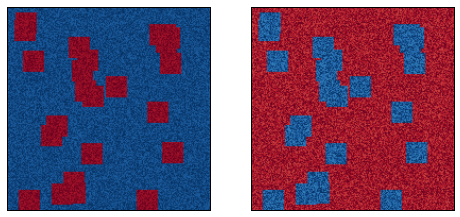

In [88]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(u, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(v, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

**TASK**
use uans[100,::40] and enter the five number all **ROUNDED TO 4 DECIMAL PLACES**

In [93]:
test = numpy.ones([10,10]) #test array to find correct value at left and bottom boundary conditions!
test[0,:]=0
test[:,0]=0
test[-1:]=0
test[:,-1]=0
test

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [94]:
def ftcs(u, v, Du, Dv, F, k, dh, dt, nt):
    time = 0
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        # solve for u of n+1
        u[1:-1,1:-1] = un[1:-1,1:-1] +\
        dt*(Du*((un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1])/dh**2+ (un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2])/dh**2) -\
        un[1:-1,1:-1]*(vn[1:-1,1:-1])**2 +\
        F*(1-un[1:-1,1:-1]))
  
        # Enforce Neumann BCs
        u[-1,:] = u[-2,:]
        u[:,-1] = u[:,-2]
        u[0,:] = u[1,:]
        u[:,0] = u[:,1]
        
        # solve for v of n+1
        v[1:-1,1:-1] = vn[1:-1,1:-1] +\
        dt*(Dv*((vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[:-2,1:-1])/dh**2+ (vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,:-2])/dh**2) +\
        un[1:-1,1:-1]*(vn[1:-1,1:-1])**2 -\
        (F+k)*vn[1:-1,1:-1])
  
        # Enforce Neumann BCs
        v[-1,:] = v[-2,:]
        v[:,-1] = v[:,-2]
        v[0,:] = v[1,:]
        v[:,0] = v[:,1]
        
    return u, v

In [95]:
ftcs(u, v, Du, Dv, F, k, dh, dt, nt)

(array([[ 0.94688596,  0.94688596,  0.94276308, ...,  0.94654335,
          0.95045925,  0.95045925],
        [ 0.94688596,  0.94688596,  0.94276308, ...,  0.94654335,
          0.95045925,  0.95045925],
        [ 0.94304624,  0.94304624,  0.93814188, ...,  0.94232123,
          0.94695203,  0.94695203],
        ..., 
        [ 0.95212265,  0.95212265,  0.94775513, ...,  0.96008348,
          0.96402059,  0.96402059],
        [ 0.95513278,  0.95513278,  0.9514138 , ...,  0.96220989,
          0.96570376,  0.96570376],
        [ 0.95513278,  0.95513278,  0.9514138 , ...,  0.96220989,
          0.96570376,  0.96570376]]),
 array([[ 0.00059954,  0.00059954,  0.00086154, ...,  0.00073427,
          0.00050918,  0.00050918],
        [ 0.00059954,  0.00059954,  0.00086154, ...,  0.00073427,
          0.00050918,  0.00050918],
        [ 0.0008483 ,  0.0008483 ,  0.00126758, ...,  0.00107597,
          0.00071802,  0.00071802],
        ..., 
        [ 0.00058796,  0.00058796,  0.00089204, ...,

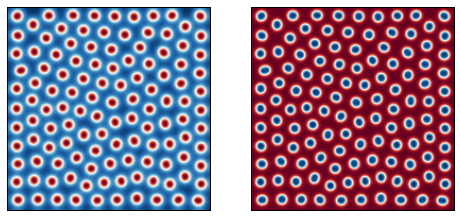

In [96]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(u, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(v, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [97]:
u[100,::40]

array([ 0.89216605,  0.62509301,  0.73082369,  0.77934618,  0.89343152])

the code above designates for j (y) value of 100, print out the i (x) values at every 40th position in the 192 points... so points number 0,40,80,120,160.

0.9247
0.8501
0.6682
0.9020
0.9040